# Predict number of bikes that will be rented on given date and time for a large bike rental firm:

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
pd.set_option('display.max_columns', None)
df=pd.read_csv("SeoulBikeData.csv", encoding= 'unicode_escape')
df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [4]:
df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [5]:
df.head(5)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [6]:
df['Rented_day']=pd.to_datetime(df['Date'], format="%d/%m/%Y").dt.day
df.head(5)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Rented_day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,1
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1


In [7]:
df['Rented_month']=pd.to_datetime(df['Date'], format="%d/%m/%Y").dt.month
df.head(5)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Rented_day,Rented_month
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,12
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,12
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,1,12
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,12
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,12


In [8]:
df.drop(["Date"], axis = 1, inplace = True)

In [9]:
df["Hour"].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23], dtype=int64)

In [10]:
df.rename(columns={"Hour": "Rented_Hour"}, inplace=True)

In [11]:
df["Holiday"].value_counts()

No Holiday    8328
Holiday        432
Name: Holiday, dtype: int64

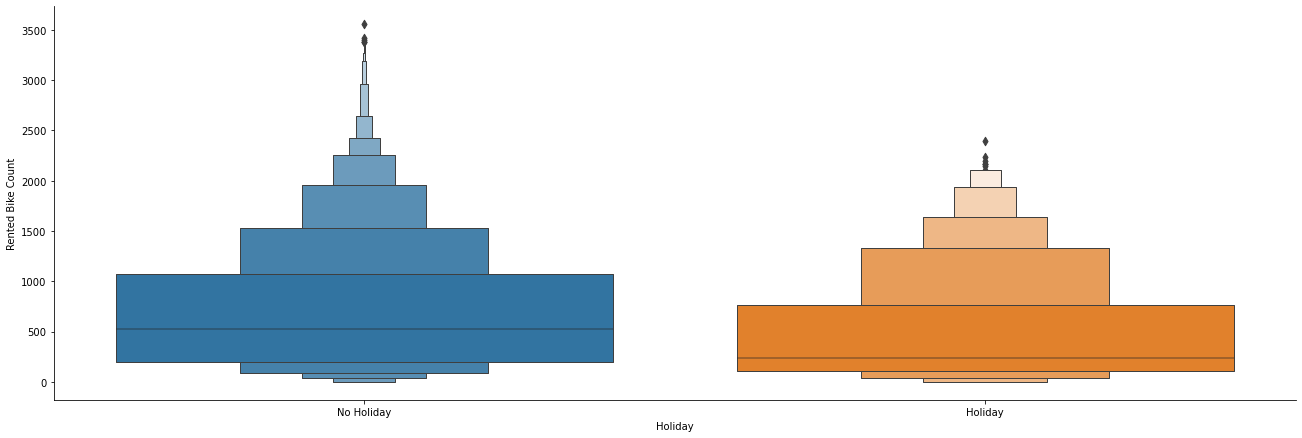

In [12]:
import seaborn as sns
sns.catplot(y = "Rented Bike Count", x = "Holiday", data = df.sort_values("Rented Bike Count", ascending = False), kind="boxen", height = 6, aspect = 3)

In [13]:
holiday=df["Holiday"]
holiday=pd.get_dummies(holiday)
holiday = holiday.replace({0:1, 1:0})
holiday.drop('No Holiday', axis=1, inplace=True)
holiday.head(5)

,Holiday
0,1
1,1
2,1
3,1
4,1


In [14]:
df["Seasons"].value_counts()

Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: Seasons, dtype: int64

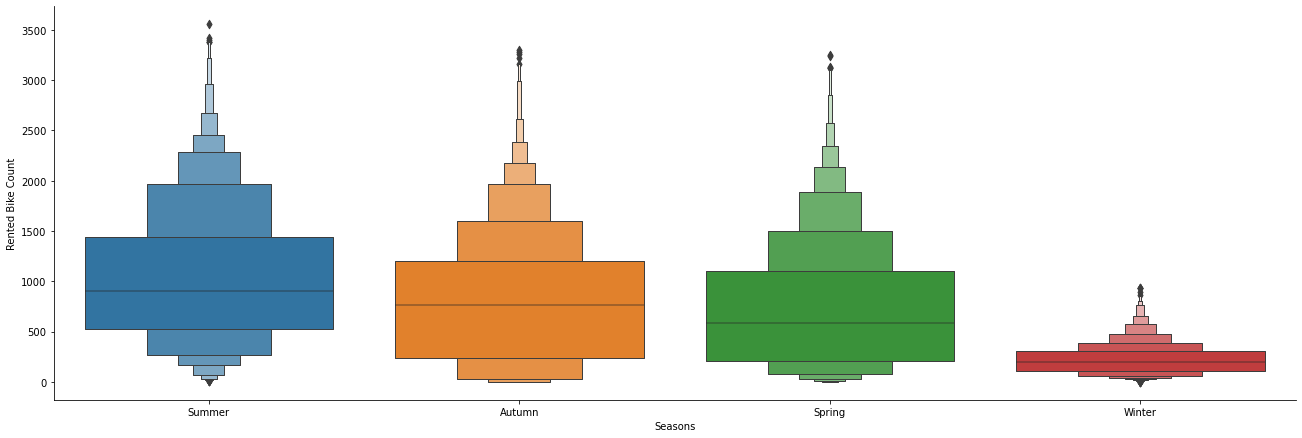

In [15]:
sns.catplot(y = "Rented Bike Count", x = "Seasons", data = df.sort_values("Rented Bike Count", ascending = False), kind="boxen", height = 6, aspect = 3)

In [16]:
Seasons = df["Seasons"]
Seasons = pd.get_dummies(Seasons, drop_first= True)
Seasons.head()

,Spring,Summer,Winter
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1


In [17]:
df["Functioning Day"].value_counts()

Yes    8465
No      295
Name: Functioning Day, dtype: int64

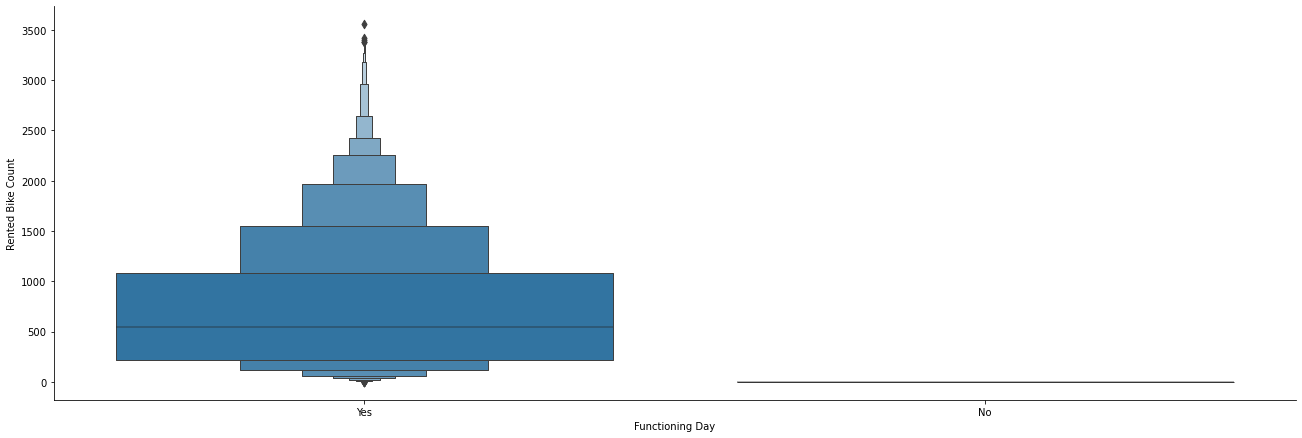

In [18]:
sns.catplot(y = "Rented Bike Count", x = "Functioning Day", data = df.sort_values("Rented Bike Count", ascending = False), kind="boxen", height = 6, aspect = 3)

In [19]:
function=df["Functioning Day"]
function=pd.get_dummies(function, drop_first= True, prefix= "Functioning_day")
function.head()

,Functioning_day_Yes
0,1
1,1
2,1
3,1
4,1


<AxesSubplot:xlabel='Rainfall(mm)', ylabel='Rented Bike Count'>

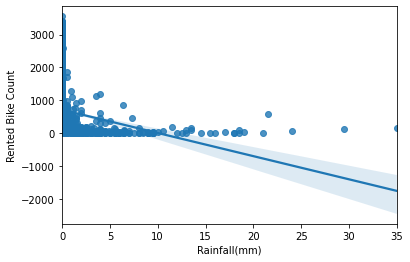

In [20]:
sns.regplot(data=df, x="Rainfall(mm)", y="Rented Bike Count")

In [21]:
import numpy as np
bins = np.linspace(df['Rainfall(mm)'].min(),df['Rainfall(mm)'].max(),4)
bins

array([ 0.        , 11.66666667, 23.33333333, 35.        ])

In [22]:
rainfall=[]
for i in df['Rainfall(mm)']:
    if i == 0:
        rainfall.append("No_Rain")
    elif i > 0 and i < 11.66666667:
        rainfall.append("Low")
    elif i >= 11.66666667 and i < 23.33333333:
        rainfall.append("Medium")
    elif i >= 23.33333333:
        rainfall.append("High")
list(set(rainfall))

['Low', 'Medium', 'High', 'No_Rain']

In [23]:
rainfall=pd.get_dummies(rainfall, prefix="Rainfall",drop_first= True)
rainfall.head()

,Rainfall_Low,Rainfall_Medium,Rainfall_No_Rain
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1


<AxesSubplot:xlabel='Snowfall (cm)', ylabel='Rented Bike Count'>

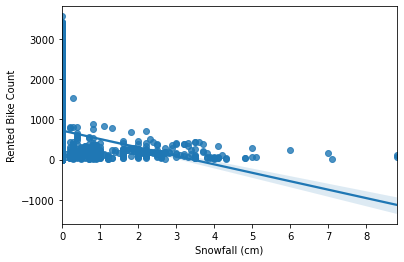

In [24]:
sns.regplot(data=df, x="Snowfall (cm)", y="Rented Bike Count")

In [25]:
bins = np.linspace(df["Snowfall (cm)"].min(),df["Snowfall (cm)"].max(),4)
bins

array([0.        , 2.93333333, 5.86666667, 8.8       ])

In [26]:
snowfall=[]
for i in df["Snowfall (cm)"]:
    if i == 0:
        snowfall.append("No_snow")
    elif i > 0 and i < 2.93333333:
        snowfall.append("Low")
    elif i >= 2.93333333 and i < 5.86666667:
        snowfall.append("Medium")
    elif i >= 5.86666667:
        snowfall.append("High")
list(set(snowfall))

['Low', 'Medium', 'High', 'No_snow']

In [27]:
snowfall=pd.get_dummies(snowfall, prefix="Snowfall",drop_first= True)
snowfall.head()

,Snowfall_Low,Snowfall_Medium,Snowfall_No_snow
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1


<AxesSubplot:xlabel='Solar Radiation (MJ/m2)', ylabel='Rented Bike Count'>

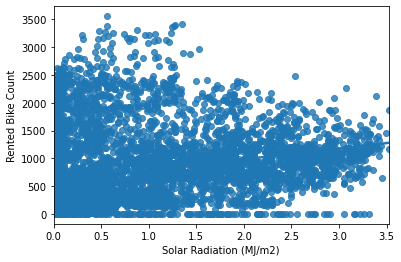

In [28]:
sns.regplot(data=df, x="Solar Radiation (MJ/m2)", y="Rented Bike Count")

In [29]:
bins = np.linspace(df["Solar Radiation (MJ/m2)"].min(),df["Solar Radiation (MJ/m2)"].max(),4)
bins

array([0.        , 1.17333333, 2.34666667, 3.52      ])

In [30]:
sun=[]
for i in df["Solar Radiation (MJ/m2)"]:
    if i == 0:
        sun.append("No_sun")
    elif i > 0 and i < 1.17333333:
        sun.append("Low")
    elif i >= 1.17333333 and i < 2.34666667:
        sun.append("Medium")
    elif i >= 2.34666667:
        sun.append("High")
list(set(sun))

['Low', 'Medium', 'High', 'No_sun']

In [31]:
sun=pd.get_dummies(sun, prefix="Solar_radiation",drop_first= True)
sun.head()

,Solar_radiation_Low,Solar_radiation_Medium,Solar_radiation_No_sun
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1


<AxesSubplot:xlabel='Dew point temperature(°C)', ylabel='Rented Bike Count'>

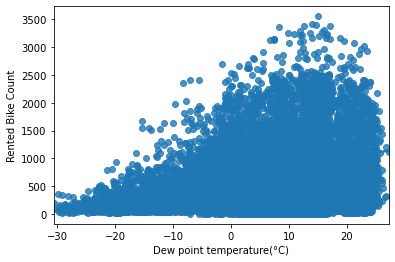

In [32]:
sns.regplot(data=df, x="Dew point temperature(°C)", y="Rented Bike Count")

In [33]:
bins = np.linspace(df["Dew point temperature(°C)"].min(),df["Dew point temperature(°C)"].max(),4)
bins

array([-30.6       , -11.33333333,   7.93333333,  27.2       ])

In [34]:
dew=[]
for i in df["Dew point temperature(°C)"]:
    if i < -11.33333333:
        dew.append("Low")
    elif i >= -11.33333333 and i < 7.93333333:
        dew.append("Medium")
    elif i >=  7.93333333 :
        dew.append("High")
list(set(dew))

['Low', 'Medium', 'High']

In [35]:
dew=pd.get_dummies(dew, prefix="Dew_temp",drop_first= True)
dew.head()

,Dew_temp_Low,Dew_temp_Medium
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


<AxesSubplot:xlabel='Visibility (10m)', ylabel='Rented Bike Count'>

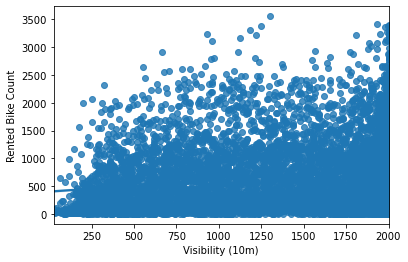

In [36]:
sns.regplot(data=df, x="Visibility (10m)", y="Rented Bike Count")

In [37]:
np.linspace(df["Visibility (10m)"].min(),df["Visibility (10m)"].max(),4)

array([  27.        ,  684.66666667, 1342.33333333, 2000.        ])

In [38]:
visibility=[]
for i in df["Visibility (10m)"]:
    if i < 684.66666667:
        visibility.append("Low")
    elif i >= 684.66666667 and i < 1342.33333333:
        visibility.append("Medium")
    elif i >=  1342.33333333 :
        visibility.append("High")
list(set(visibility))

['Medium', 'Low', 'High']

In [39]:
visibility=pd.get_dummies(visibility, prefix="visibility",drop_first= True)
visibility.head()

,visibility_Low,visibility_Medium
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


<AxesSubplot:xlabel='Wind speed (m/s)', ylabel='Rented Bike Count'>

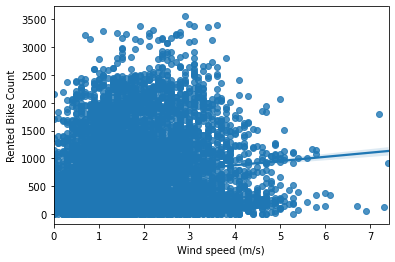

In [40]:
sns.regplot(data=df, x="Wind speed (m/s)", y="Rented Bike Count")

In [41]:
np.linspace(df["Wind speed (m/s)"].min(),df["Wind speed (m/s)"].max(),4)

array([0.        , 2.46666667, 4.93333333, 7.4       ])

In [42]:
wind=[]
for i in df["Wind speed (m/s)"]:
    if i == 0:
        wind.append("No_wind")
    elif i > 0 and i < 2.46666667:
        wind.append("Low")
    elif i >= 2.46666667 and i < 4.93333333:
        wind.append("Medium")
    elif i >= 4.93333333:
        wind.append("High")
list(set(wind))

['Low', 'No_wind', 'Medium', 'High']

In [43]:
wind=pd.get_dummies(wind, prefix="Wind_speed",drop_first= True)
wind.head()

,Wind_speed_Low,Wind_speed_Medium,Wind_speed_No_wind
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


<AxesSubplot:xlabel='Humidity(%)', ylabel='Rented Bike Count'>

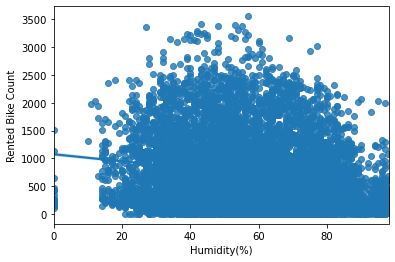

In [44]:
sns.regplot(data=df, x="Humidity(%)", y="Rented Bike Count")

In [45]:
np.linspace(df["Humidity(%)"].min(),df["Humidity(%)"].max(),4)

array([ 0.        , 32.66666667, 65.33333333, 98.        ])

In [46]:
humidity=[]
for i in df["Humidity(%)"]:
    if i == 0:
        humidity.append("No_Humidity")
    elif i > 0 and i < 32.66666667:
        humidity.append("Low")
    elif i >= 32.66666667 and i < 65.33333333:
        humidity.append("Medium")
    elif i >= 65.33333333:
        humidity.append("High")
list(set(humidity))

['Medium', 'No_Humidity', 'Low', 'High']

In [47]:
humidity=pd.get_dummies(humidity, prefix="Humidity",drop_first= True)
humidity.head()

,Humidity_Low,Humidity_Medium,Humidity_No_Humidity
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0


<AxesSubplot:xlabel='Temperature(°C)', ylabel='Rented Bike Count'>

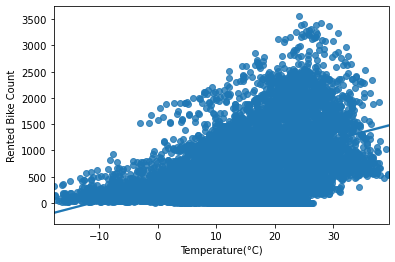

In [48]:
sns.regplot(data=df, x="Temperature(°C)", y="Rented Bike Count")

In [49]:
np.linspace(df["Temperature(°C)"].min(),df["Temperature(°C)"].max(),4)

array([-17.8       ,   1.26666667,  20.33333333,  39.4       ])

In [50]:
Temp=[]
for i in df["Temperature(°C)"]:
    if i < 1.26666667:
        Temp.append("Low")
    elif i >= 1.26666667 and i < 20.33333333:
        Temp.append("Medium")
    elif i >=  20.33333333 :
        Temp.append("High")
list(set(Temp))

['Low', 'Medium', 'High']

In [51]:
Temp=pd.get_dummies(Temp, prefix="Temperature",drop_first= True)
Temp.head()

,Temperature_Low,Temperature_Medium
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [52]:
df.head()

,Rented Bike Count,Rented_Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Rented_day,Rented_month
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,12
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,12
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,1,12
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,12
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,12


In [53]:
bike=pd.DataFrame(df[["Rented_month","Rented_day","Rented_Hour"]])

In [54]:
bike=pd.concat([bike,Temp,humidity,wind,visibility,dew,sun,rainfall,snowfall,Seasons,holiday,function], axis=1)
bike.head()

,Rented_month,Rented_day,Rented_Hour,Temperature_Low,Temperature_Medium,Humidity_Low,Humidity_Medium,Humidity_No_Humidity,Wind_speed_Low,Wind_speed_Medium,Wind_speed_No_wind,visibility_Low,visibility_Medium,Dew_temp_Low,Dew_temp_Medium,Solar_radiation_Low,Solar_radiation_Medium,Solar_radiation_No_sun,Rainfall_Low,Rainfall_Medium,Rainfall_No_Rain,Snowfall_Low,Snowfall_Medium,Snowfall_No_snow,Spring,Summer,Winter,Holiday,Functioning_day_Yes
0,12,1,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,1,1
1,12,1,1,1,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,1,1
2,12,1,2,1,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,1,1
3,12,1,3,1,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,1,1
4,12,1,4,1,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,1,1


In [55]:
target=df["Rented Bike Count"]
target.head()

0    254
1    204
2    173
3    107
4     78
Name: Rented Bike Count, dtype: int64

In [56]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(bike,target, test_size=0.2, random_state=42)

In [57]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(x_train, y_train)

RandomForestRegressor()

In [58]:
y_pred = reg_rf.predict(x_test)

In [59]:
reg_rf.score(x_train, y_train)

0.9814143944066929

In [60]:
reg_rf.score(x_test, y_test)

0.8506661486993997

<AxesSubplot:xlabel='Rented Bike Count', ylabel='Density'>

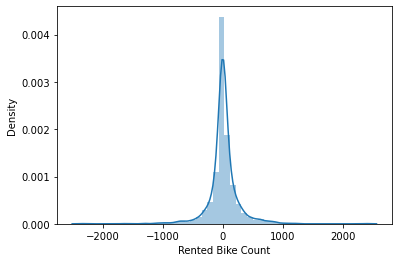

In [61]:
sns.distplot(y_test-y_pred)

In [62]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 139.95573630136985
MSE: 62219.38730690639
RMSE: 249.4381432477928


In [63]:
metrics.r2_score(y_test, y_pred)

0.8506661486993997

In [64]:
import pickle
file = open('bike_rent.pkl', 'wb')
pickle.dump(reg_rf, file)
file.close()

In [65]:
model = open('bike_rent.pkl','rb')
forest = pickle.load(model)
model.close()

In [66]:
pkl_pred=forest.predict(x_test)

In [67]:
forest.score(x_train, y_train)

0.9814143944066929

In [68]:
forest.score(x_test, y_test)

0.8506661486993997

<AxesSubplot:xlabel='Rented Bike Count', ylabel='Density'>

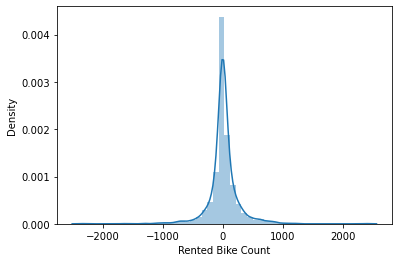

In [69]:
sns.distplot(y_test-pkl_pred)

In [70]:
metrics.r2_score(y_test,pkl_pred)

0.8506661486993997